<a href="https://colab.research.google.com/github/prajwalp111/ML/blob/main/seoul_bike_ml/seoulBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Dataset : https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

# Data Loading

In [2]:
dataset_cols  = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']
df = pd.read_csv('https://raw.githubusercontent.com/prajwalp111/ML/main/seoul_bike_ml/SeoulBikeData.csv', encoding='ISO-8859-1').drop(['Date','Seasons','Holiday'], axis=1)

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

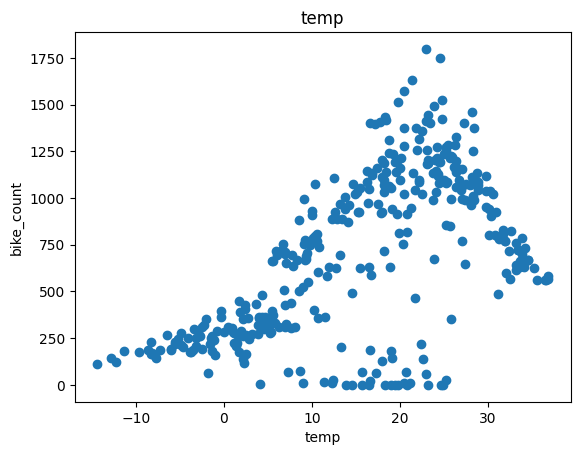

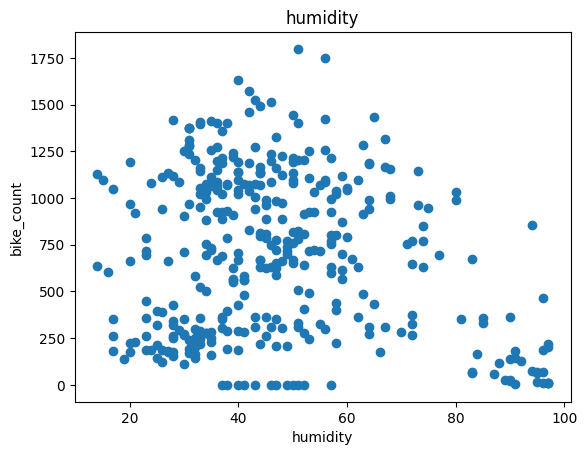

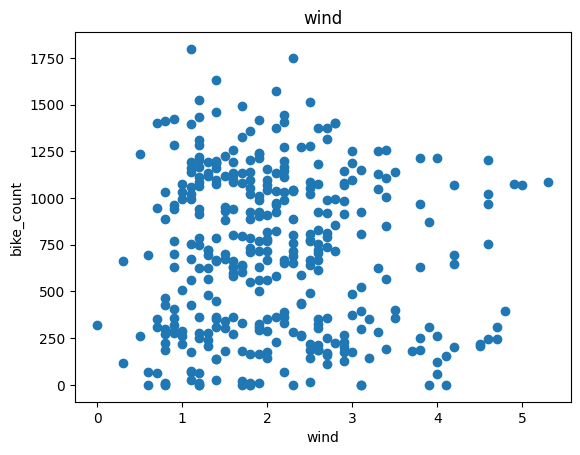

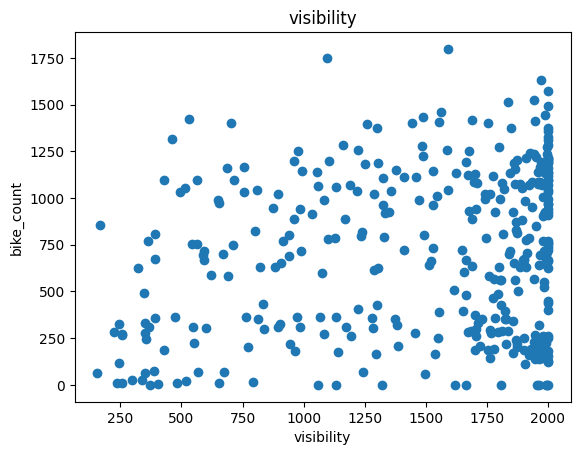

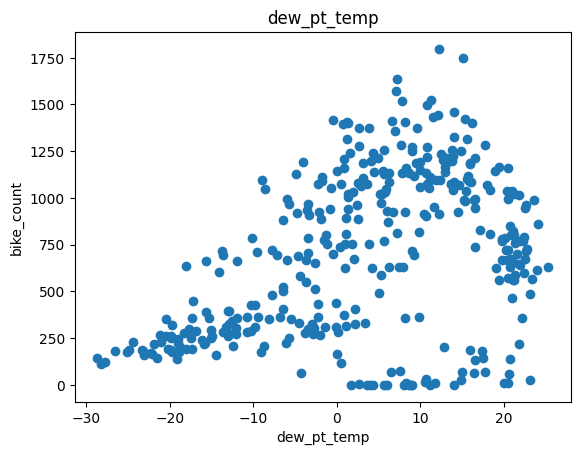

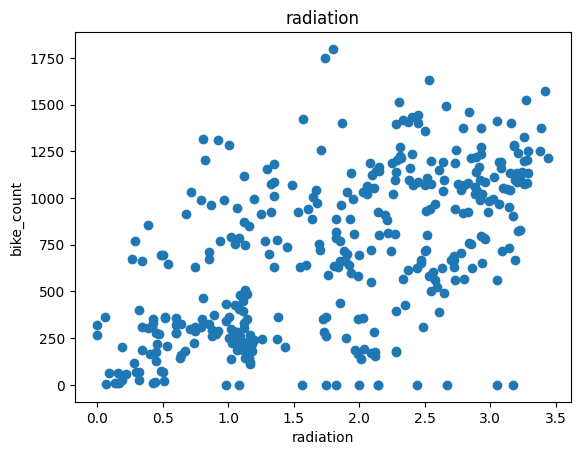

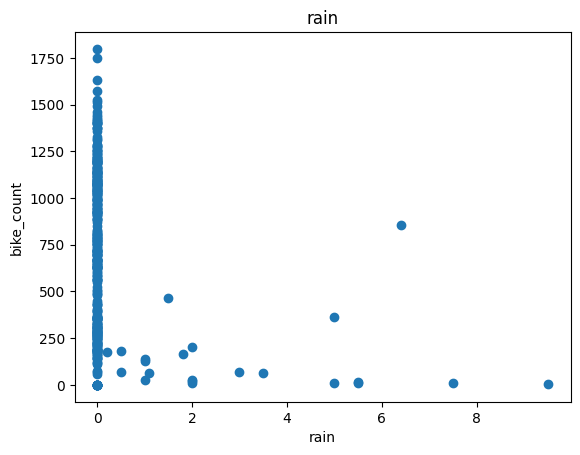

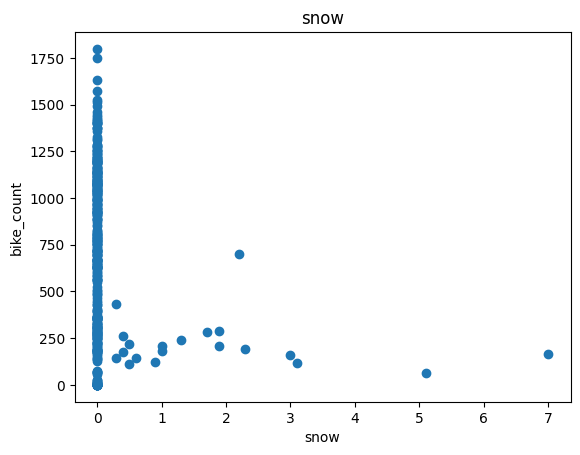

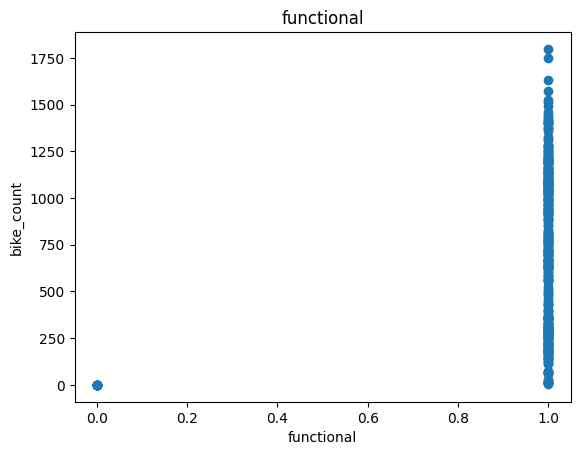

In [5]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('bike_count')
  plt.show()

based on graph

In [6]:
df = df.drop(['wind','visibility','functional'], axis = 1)

In [7]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train , test n valid

### Simple Linear Regession

In [8]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


here taking two columns x , y from df and returning only two columns



In [9]:
def get_xy(dataFrame, y_labels, X_labels=None):
  dataFrame = copy.deepcopy(dataFrame)
  if not X_labels:
    X = dataFrame[[c for c in dataFrame.columns if c not in y_labels]].values
  else:
    if len(X_labels) == 1:
      X = dataFrame[X_labels[0]].values.reshape(-1,1)
    else:
      X = dataFrame[X_labels].values

  y = dataFrame[y_labels].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

**Flexibility:**

1.Sometimes when you train a model, you may want to control exactly which columns are input features (X) and which column(s) are target/output (y).

2.If X_labels is given → use only those columns as input.

3.If X_labels is not given → automatically use all columns except y_labels.

**Handling 1 feature vs multiple features:**

1.If you pick only 1 feature (say "age" column alone), .values would return a 1D array like:
[25, 30, 22]
but machine learning libraries (like sklearn) expect a 2D array:
[[25], [30], [22]]

2.So you reshape it into (n_samples, 1) shape using .reshape(-1, 1).

3.If multiple features are selected (say "age" and "salary"), .values already gives you a 2D array, so no reshaping needed.



In [10]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', X_labels = ['temp'])
_, X_val_temp, y_val_temp = get_xy(valid, 'bike_count', X_labels = ['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', X_labels = ['temp'])

In [11]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [12]:
print('coeff',temp_reg.coef_)
print('intercept',temp_reg.intercept_)
print('r^2',temp_reg.score(X_train_temp, y_train_temp))

coeff [[20.47102274]]
intercept [362.35240228]
r^2 0.3259034499253469


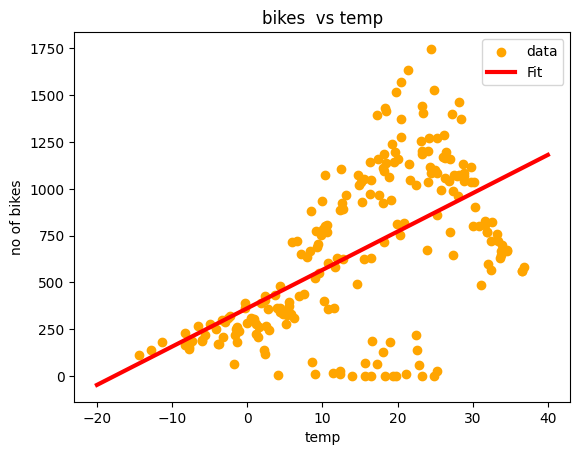

In [13]:
plt.scatter(X_train_temp, y_train_temp, label='data', color ='orange')
# x = tf.linspace(-20, 40, 100)
# plt.plot(x,temp_reg.predict(np.array(x).reshape(-1.1)), label='Fit', color='red', linewidth=3)

x = np.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(x.reshape(-1, 1)), label='Fit', color='red', linewidth=3)  # Corrected: reshape(-1, 1)


plt.legend()
plt.title("bikes  vs temp")
plt.ylabel('no of bikes')
plt.xlabel('temp')
plt.show()

### Multiple Linear Regession

In [14]:
def get_2dxy(dataFrame, y_labels, X_labels=None):
  dataFrame = copy.deepcopy(dataFrame)
  if X_labels is None:
    X = dataFrame[[c for c in dataFrame.columns if c != y_labels]].values
  else:
    if len(X_labels) == 1:
      X = dataFrame[X_labels[0]].values.reshape(-1,1)
    else:
      X = dataFrame[X_labels].values

  y = dataFrame[y_labels].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

In [15]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_2dxy(train, 'bike_count', X_labels = df.columns[1:])
_, X_val_all, y_val_all = get_2dxy(valid, 'bike_count', X_labels = df.columns[1:])
_, X_test_all, y_test_all = get_2dxy(test, 'bike_count', X_labels =df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [17]:
all_reg.score(X_test_all, y_test_all)

0.4055674298883194

In [34]:
y_pred_lr = all_reg.predict(X_test_all)

# Regression with Neural Net (one single neuron)

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [19]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Normalization Layer:**

This layer normalizes the input data by subtracting the mean and dividing by the standard deviation (Z-score normalization).

input_shape=(1,): This implies each input sample has 1 feature (scalar input like temperature).

axis=None: This tells the layer to normalize across the entire dataset, not per feature.

The adapt() method computes the mean and variance from this data, which will be used later during training/inference for normalization.

In [20]:
 temp_nn_model = tf.keras.Sequential([
     temp_normalizer,
     tf.keras.layers.Dense(1)
 ])

In [21]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [22]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1),y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_temp.reshape(-1),y_val_temp)
)

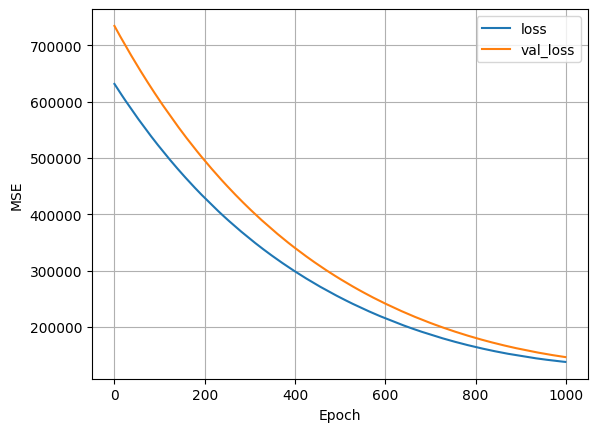

In [23]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


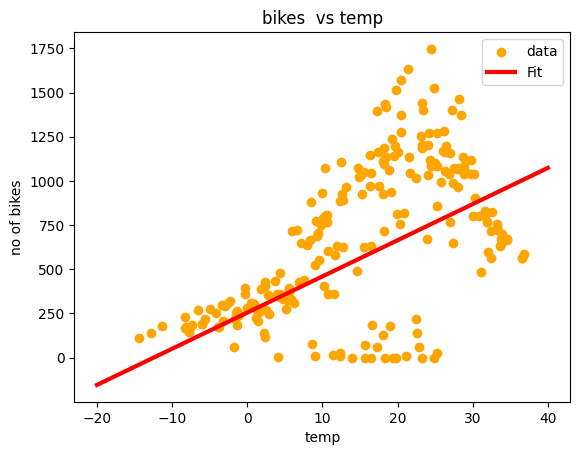

In [24]:
plt.scatter(X_train_temp, y_train_temp, label='data', color ='orange')
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(x.reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("bikes  vs temp")
plt.ylabel('no of bikes')
plt.xlabel('temp')
plt.show()

# ***for multiple????***

# Neural Network

In [44]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
     temp_normalizer,
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(1)
 ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_temp,y_val_temp)
)

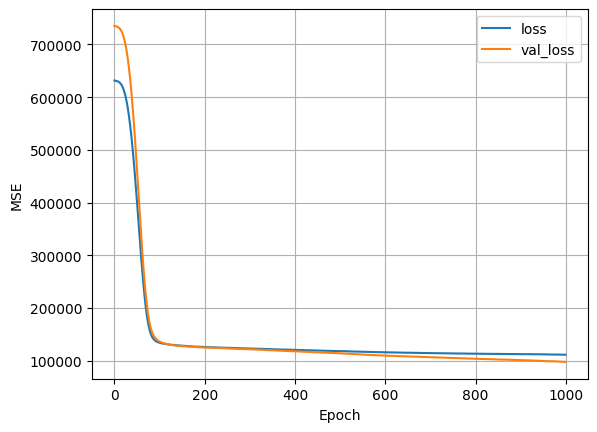

In [46]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


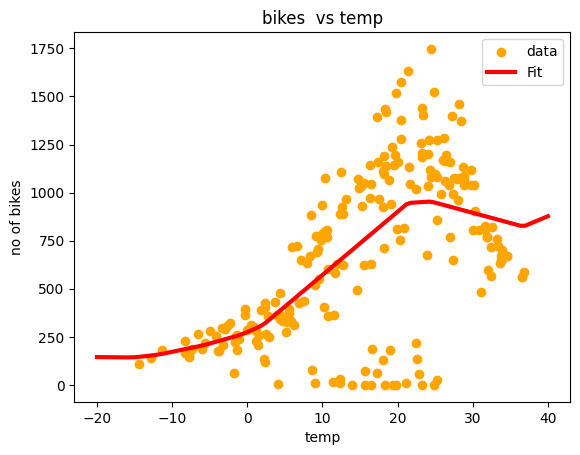

In [47]:
plt.scatter(X_train_temp, y_train_temp, label='data', color ='orange')
x = np.linspace(-20, 40, 100)
plt.plot(x,nn_model.predict(x.reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("bikes  vs temp")
plt.ylabel('no of bikes')
plt.xlabel('temp')
plt.show()

this graph show that the data is no longer linear


## for multiple

In [48]:
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,), axis=-1)
all_normalizer.adapt(X_train_temp.reshape(-1,1))

In [49]:
nn_model = tf.keras.Sequential([
     all_normalizer,
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(1)
 ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'mean_squared_error')

In [50]:
history = nn_model.fit(
    X_train_all, y_train_all,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_all,y_val_all)
)

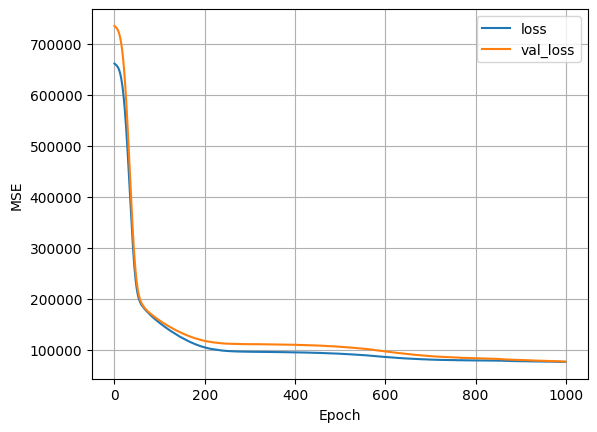

In [51]:
plot_loss(history)

#### MSE for both lr n nn

In [52]:

y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [53]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [54]:
MSE(y_pred_lr, y_test_all)

np.float64(107212.16688362174)

In [55]:
MSE(y_pred_nn, y_test_all)

np.float64(90583.62827113776)

-above we can see that Mean squared error of** nn < lr **

-we have to decide on oue own which model is usefull which and has less error

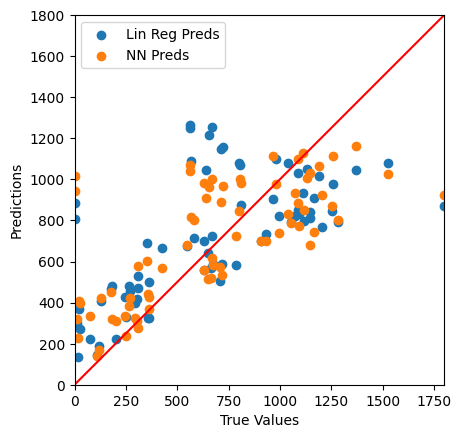

In [56]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")